## Cinnamon prices

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd

### Importing the dataset

In [ ]:
# Importing the dataset
url = "/content/drive/MyDrive/Cinnex/synthetic_cinnamon_data.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

,ID,Cinnamon Price (LKR),Location,Year,Month,Quantity (kg)
0,1,978.76,Badulla,2023,January,172.33
1,2,841.03,Hambantota,2019,June,168.95
2,3,1007.52,Galle,2023,April,131.41
3,4,1062.35,Ratnapura,2021,April,156.33
4,5,740.22,Galle,2020,August,198.11


### Data plot

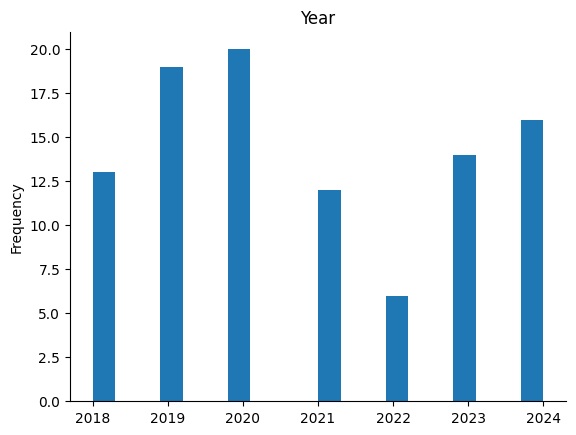

In [ ]:
# Year

from matplotlib import pyplot as plt
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

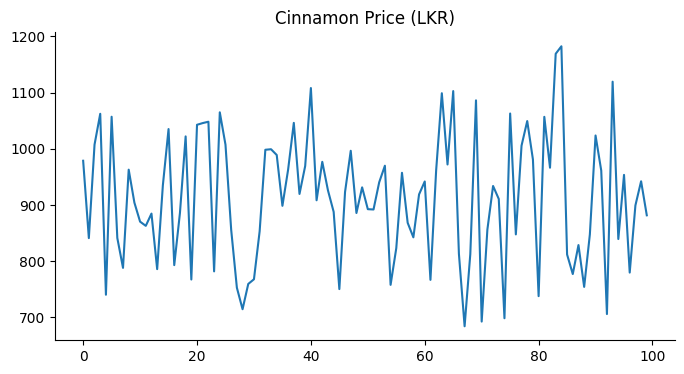

In [ ]:
# Price

from matplotlib import pyplot as plt
data['Cinnamon Price (LKR)'].plot(kind='line', figsize=(8, 4), title='Cinnamon Price (LKR)')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data Preprocessing

In [ ]:
data.shape

(100, 6)

In [ ]:
data.isnull().sum()

,0
ID,0
Cinnamon Price (LKR),0
Location,0
Year,0
Month,0
Quantity (kg),0


In [ ]:
data.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    100 non-null    int64  
 1   Cinnamon Price (LKR)  100 non-null    float64
 2   Location              100 non-null    object 
 3   Year                  100 non-null    int64  
 4   Month                 100 non-null    object 
 5   Quantity (kg)         100 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [ ]:
data['Location'].value_counts()

,count
Location,
Anuradhapura,15
Badulla,14
Colombo,13
Hambantota,11
Galle,11
Kandy,10
Kurunegala,10
Ratnapura,8
Matale,8


In [ ]:
data['Year'].value_counts()

,count
Year,
2020,20
2019,19
2024,16
2023,14
2018,13
2021,12
2022,6


In [ ]:
data['Month'].value_counts()

,count
Month,
October,12
April,11
May,11
June,10
February,9
September,8
November,8
August,7
December,7


In [ ]:
len(data['Month'].value_counts())

12

### One-Hot Encoding

In [ ]:
data = pd.get_dummies(data)
data.head(2)
data.shape

(100, 25)

## Model Building

In [ ]:
X = data.drop('Cinnamon Price (LKR)', axis=1)
y = data['Cinnamon Price (LKR)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape

((75, 24), (25, 24))

### Model accuracy test

In [ ]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> '+ str(acc))

### Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
ls = Lasso()
model_acc(ls)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.5246342289433152
Lasso() --> 0.49998398196415017
DecisionTreeRegressor() --> 0.2658009143058697
RandomForestRegressor() --> 0.37236784100553666


In [ ]:
# Use Random Forest Regressor

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit

RandomForestRegressor(n_estimators=10)

In [ ]:
best_fit.score(X_train, y_train)

0.9143480569863298

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 6883.745413799998
Root Mean Squared Error (RMSE): 82.96833982791266
R-squared (R2): 0.3872536674938687


### Save Model

In [ ]:
import pickle
import os

path = '/content/drive/MyDrive/Cinnex/'

file_path = os.path.join(path, 'predictor.pickle')
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_fit, file)

In [ ]:
X_train.columns

Index(['ID', 'Year', 'Quantity (kg)', 'Location_Anuradhapura',
       'Location_Badulla', 'Location_Colombo', 'Location_Galle',
       'Location_Hambantota', 'Location_Kandy', 'Location_Kurunegala',
       'Location_Matale', 'Location_Ratnapura', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object')

In [ ]:
X_train.columns

Index(['ID', 'Year', 'Quantity (kg)', 'Location_Anuradhapura',
       'Location_Badulla', 'Location_Colombo', 'Location_Galle',
       'Location_Hambantota', 'Location_Kandy', 'Location_Kurunegala',
       'Location_Matale', 'Location_Ratnapura', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object')

## Production

### Testing

#### Import necessary libraries

In [ ]:
import pickle
import pandas as pd

#### Load the saved model

In [ ]:
model_path = '/content/predictor.pickle'  # Update path
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

#### Prepare test data

In [ ]:
# Prepare test data
def prepare_test_data(test_data, training_data_columns):

  # 1. One-hot encoding
  categorical_cols = ['Location', 'Month', 'Year']
  test_data = pd.get_dummies(test_data, columns=categorical_cols)

  # 2. Column alignment with training data
  test_data = test_data.reindex(columns=training_data_columns, fill_value=0)

  # 3. Drop the target variable (if present)
  X_test = test_data.drop('Cinnamon Price (LKR)', axis=1, errors='ignore') # errors='ignore' to avoid error if column doesn't exist

  return X_test

# Assuming test data is in a CSV file:
test_data = pd.read_csv('/content/drive/MyDrive/Cinnex/synthetic_cinnamon_data.csv')
# If test data is already a pandas DataFrame, you can skip the CSV reading step.

# Prepare the test data
X_test_prepared = prepare_test_data(test_data, X_train.columns) # Assuming X_train from your training code

# Make predictions
predictions = loaded_model.predict(X_test_prepared)

In [ ]:
import random

# Assuming 'data' is your DataFrame
num_random_samples = 5  # Choose the number of random samples you want

random_indices = random.sample(range(len(data)), num_random_samples)

for index in random_indices:
    random_row = data.iloc[index]
    price = random_row['Cinnamon Price (LKR)']
    print(f"Random Index: {index}, Cinnamon Price: {price}")

Random Index: 33, Cinnamon Price: 999.26
Random Index: 93, Cinnamon Price: 1119.5
Random Index: 91, Cinnamon Price: 961.22
Random Index: 38, Cinnamon Price: 919.67
Random Index: 75, Cinnamon Price: 1062.86


#### Make predictions

In [ ]:
predictions = loaded_model.predict(X_test)

#### Evaluate the predictions

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6883.745413799998
R-squared: 0.3872536674938687


### FAST API

In [ ]:
import pickle
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the model
model_path = '/predictor.pickle'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Assuming input data is sent as JSON
    # Preprocess the data if needed (e.g., one-hot encoding)
    prediction = model.predict(data)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')